## Linear Regression
Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

In [22]:
# imports panda, numpy
import pandas as pd
import numpy as np
import os

# this allows plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# set the file path 
# TODO need to make it dynamic
data_file_path = os.path.join('C:\\Users\\ashishyog\\Desktop\\Housing Prices\\data', 'housing.csv')
print(data_file_path)

C:\Users\ashishyog\Desktop\Housing Prices\data\housing.csv


In [36]:
# read the data with all default parameters
data = pd.read_csv(data_file_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## One hot encoding
As above we can see, ocean_proximity is a non numeric value. Regression algorithms only understand numerical data. So, we will convert this to numerical value.
As we can see, from the data set possible value for ocean_proximity are as follows
1) <1H OCEAN
2) INLAND
3) ISLAND
4) NEAR BAY
5) NEAR OCEAN

In [38]:
# column ocean_proximity
data = pd.get_dummies(data,columns=['ocean_proximity'])

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null int64
total_rooms                   20640 non-null int64
total_bedrooms                20433 non-null float64
population                    20640 non-null int64
households                    20640 non-null int64
median_income                 20640 non-null float64
median_house_value            20640 non-null int64
ocean_proximity_<1H OCEAN     20640 non-null uint8
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(4), int64(5), uint8(5)
memory usage: 1.5 MB
None


## Null values
As you can see from the data above, there are some missing values for total_bedrooms. So, we will try and replace those with mean value of that column :)

In [40]:
# return null rows
data[data.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,0,0,0,1,0
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,0,0,0,1,0
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,0,0,0,1,0
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,0,0,0,1,0
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,0,0,0,1,0
738,-122.14,37.67,37,3342,NaN,1635,557,4.7933,186900,0,0,0,1,0
1097,-121.77,39.66,20,3759,NaN,1705,600,4.7120,158600,0,1,0,0,0
1350,-121.95,38.03,5,5526,NaN,3207,1012,4.0767,143100,0,1,0,0,0
1456,-121.98,37.96,22,2987,NaN,1420,540,3.6500,204100,0,1,0,0,0
1493,-122.01,37.94,23,3741,NaN,1339,499,6.7061,322300,0,0,0,1,0


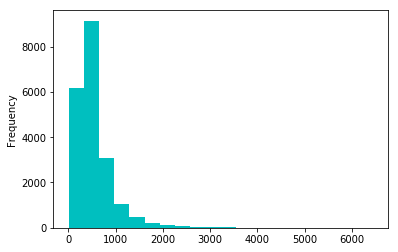

In [41]:
# Draw histogram
data.total_bedrooms.plot(kind='hist', bins=20, color='c');

In [43]:
# replace the missing values
data.total_bedrooms.fillna(data.total_bedrooms.mean(), inplace=True)

In [65]:
print(LogBedrooms.median())

6.0844994130751715


In [14]:
# median values
#data.groupby('total_rooms').total_bedrooms.median()

In [16]:
# check info again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null int64
total_rooms                   20640 non-null int64
total_bedrooms                20640 non-null float64
population                    20640 non-null int64
households                    20640 non-null int64
median_income                 20640 non-null float64
median_house_value            20640 non-null int64
ocean_proximity_<1H OCEAN     20640 non-null uint8
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(4), int64(5), uint8(5)
memory usage: 1.5 MB


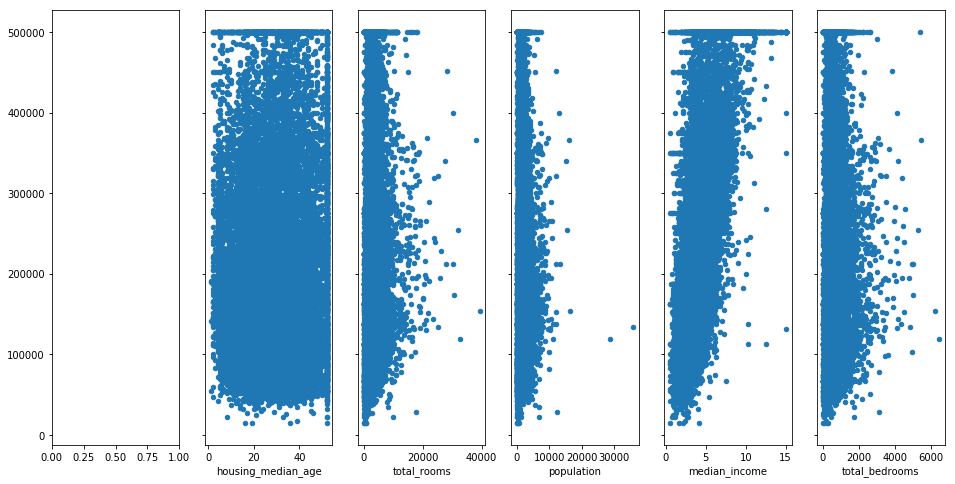

In [54]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, sharey=True, figsize=(16,8))

data.plot(kind='scatter', x='housing_median_age', y='median_house_value', ax=axs[1])
data.plot(kind='scatter', x='total_rooms', y='median_house_value', ax=axs[2])
data.plot(kind='scatter', x='population', y='median_house_value', ax=axs[3])
data.plot(kind='scatter', x='median_income', y='median_house_value', ax=axs[4])
data.plot(kind='scatter', x='total_bedrooms', y='median_house_value', ax=axs[5])


## Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):



What elements are present in the diagram?
The black dots are the observed values of x and y.
The blue line is the least squares line.
The red lines are the residuals, which is the distance between the observed values and the least squares line.
How do the model coefficients relate to the least squares line?
β
0
β0
is the intercept (the value of 
y
y
when 
x
x
=0)
β
1
β1
is the slope (the change in 
y
y
divided by change in 
x
x
)
Here is a graphical depiction of those calculations:



The mathematics behind the Least Squares Method.

Take a quick look at the plot created. Now consider each point, and know that each of them have a coordinate in the form (X,Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distanace between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:


Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were: 
D
2
1
+
D
2
2
+
D
2
3
+
D
2
4
+....+
D
2
N
D12+D22+D32+D42+....+DN2

So how do we find this line? The least-square line approximating the set of points:
(X,Y
)
1
,(X,Y
)
2
,(X,Y
)
3
,(X,Y
)
4
,(X,Y
)
5
,
(X,Y)1,(X,Y)2,(X,Y)3,(X,Y)4,(X,Y)5,
has the equation: 
Y=
a
0
+
a
1
X
Y=a0+a1X
this is basically just a rewritten form of the standard equation for a line: 
Y=mx+b
Y=mx+b

We can solve for these constants a0 and a1 by simultaneously solving these equations: 
ΣY=
a
0
N+
a
1
ΣX
ΣY=a0N+a1ΣX
ΣXY=
a
0
ΣX+
a
1
Σ
X
2
ΣXY=a0ΣX+a1ΣX2

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

In [60]:
# create X and y
feature_cols = [
'housing_median_age',
'total_rooms',
'median_income',
'ocean_proximity_<1H OCEAN',
'ocean_proximity_INLAND',
'ocean_proximity_ISLAND',
'ocean_proximity_NEAR BAY',
'ocean_proximity_NEAR OCEAN',
]
X = data[feature_cols]
y = data.median_house_value

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

67235.03211208072
[ 1.14362551e+03  3.46708615e+00  3.75629245e+04 -2.86646944e+04
 -1.00149503e+05  1.56167531e+05 -1.65631054e+04 -1.07902281e+04]


How do we interpret these coefficients? For a given amount of housing_median_age and total_rooms higher is the price.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [63]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='median_house_value ~ housing_median_age + total_rooms + median_income + ocean_proximity_INLAND', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     7646.
Date:                Tue, 27 Nov 2018   Prob (F-statistic):               0.00
Time:                        01:03:08   Log-Likelihood:            -2.6049e+05
No. Observations:               20640   AIC:                         5.210e+05
Df Residuals:                   20635   BIC:                         5.210e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                4.27e+04   2217.703     19.256      0.000    3.84e+04    4.71e+04
housing_median_age      1192.0954     45.126     26.417      0.000    1103.646    1280.545
total_rooms                3.5377      0.254     13.912      0.000       3.039       4.036
median_income           3.747e+04    284.652    131.625      0.000    3.69e+04     3.8e+04
ocean_proximity_INLAND -7.668e+04   1173.062    -65.368      0.000    -7.9e+04   -7.44e+04
==============================================================================
Omnibus:                     4823.398   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12840.090
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       5.935   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""